# Homework Lesson 1

Here we try to enter the Kaggle competition.
The data is downloaded from kaggle. Next, it is moved into a directory tree as follows:
data/redux/train/{cats,dogs}
data/redux/valid/{cats,dogs}
data/resux/test
data/redux/sample/train/{cats,dogs}
data/redux/sample/valid/{cats,dogs}

Here, train and valid contain randomly selected images from the original Kaggle data. 
On a subset of the original data, the same was done for sample/train and sample/valid.

Much of the code below is copied from the actual lesson 1.

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [1]:
import sys
sys.executable
#import matplotlib
%matplotlib inline

Define path to data: (It's a good idea to put it in a subdirectory of your notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)

A few basic libraries that we'll need for the initial exercises:

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
#from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [3]:
#import utils; reload(utils)
from utils import plots
import sys
print("Hello Texas")

Hello Texas


Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [4]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, filenames, base_path, titles=None, ):
    print ("attempting to print {0} in {1}".format(idx, base_path))
    plots([image.load_img(base_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

## Using sample data

In [5]:
from utils import *
from vgg16 import Vgg16
vgg = Vgg16()
batch_size=32

In [11]:
path = "data/redux/sample/"
test_path = 'data/redux/test/' #We use all the test data
results_path= 'data/redux/weights/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [6]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Calling *finetune()* modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'dog' or 'cat'.

In [7]:
vgg.finetune(batches)

Finally, we *fit()* the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. (An *epoch* is one full pass through the training data.)

In [8]:
vgg.fit(batches, val_batches, nb_epoch=4)


Epoch 1/4
200/200 [==============================] - 6s - loss: 0.9119 - acc: 0.7250 - val_loss: 0.0822 - val_acc: 0.9800
Epoch 2/4
200/200 [==============================] - 6s - loss: 0.2937 - acc: 0.9350 - val_loss: 0.0558 - val_acc: 0.9600
Epoch 3/4
200/200 [==============================] - 6s - loss: 0.1498 - acc: 0.9550 - val_loss: 0.0482 - val_acc: 0.9800
Epoch 4/4
200/200 [==============================] - 6s - loss: 0.0947 - acc: 0.9650 - val_loss: 0.0617 - val_acc: 0.9400


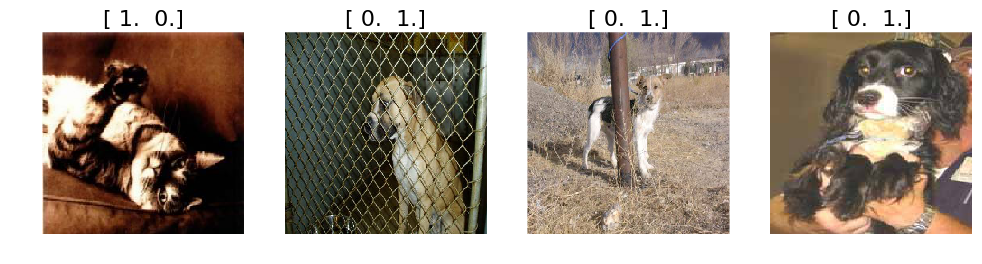

In [12]:
vgg.model.save_weights(results_path + "first_4.h5")
imgs,labels = next(batches)
plots(imgs[:4], titles=labels[:4])

In [ ]:
plots(imgs[:6], titles=labels[:6])

In [14]:
print (len(imgs))
print (len(labels))
vgg.predict(imgs, True)
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

32
32
Found 50 images belonging to 2 classes.


In [15]:
print (val_batches)

In [29]:
# These are the real classes
real_labels = val_batches.classes

In [30]:
val_batches.class_indices

{'cat': 0, 'dog': 1}

In [31]:
# This is what our model predicts:
np.round(probs)
our_labels = np.round(probs[:,1])

In [44]:
incorrect_labels = np.where(our_labels != real_labels)[0]
print (list(incorrect_labels))

[10, 20, 46]


In [24]:
plots_idx(incorrect_labels, val_batches.filenames, valid_path)

In [56]:
correct_labels = np.random.permutation(np.where(our_labels == real_labels)[0])

In [23]:
plots_idx(correct_labels[:n_view], val_batches.filenames, valid_path)

NameError: name 'val_path' is not defined

## Using real data

In [5]:
from utils import *
from vgg16 import Vgg16
vgg = Vgg16()
batch_size=128

In [6]:
path = "data/redux/"
test_path = 'data/redux/test/' #We use all the test data
results_path= 'data/redux/weights/'
train_path=path + '/train/'
valid_path=path + '/valid/'

In [7]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
vgg.finetune(batches)
#vgg.fit(batches, val_batches, nb_epoch=1)

In [9]:
vgg.model.load_weights((results_path + "real_epoch_1.h5"))
#vgg.model.save_weights(results_path + "real_epoch_1.h5")
#vgg.fit(batches, val_batches, nb_epoch=1)

In [10]:
#vgg.model.save_weights(results_path + "real_epoch_2.h5")
vgg.model.load_weights((results_path + "real_epoch_2.h5"))

In [11]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [12]:
real_labels = val_batches.classes
our_dog_probs = probs[:,1]
our_labels = np.round(probs[:,1])

In [13]:
len(np.where(real_labels != our_labels))/float(len(real_labels))

0.0005

### Random correct and incorrect labels

In [14]:
incorrect_labels = np.random.permutation(np.where(real_labels != our_labels)[0])
correct_labels = np.random.permutation(np.where(real_labels == our_labels)[0])

[1641 1871  819   24  739  388 1598 1861  451  816  799  547  705   64 1711  244  387  384 1304  130
  365  974  492 1069  687  521  869   41  371]
attempting to print [1641 1871  819   24] in data/redux//valid/


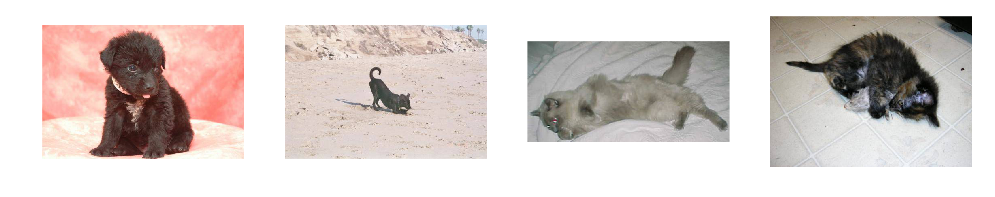

In [15]:
print (incorrect_labels)
plots_idx(incorrect_labels[:n_view], val_batches.filenames, valid_path)

attempting to print [ 578  914  223 1283] in data/redux//valid/


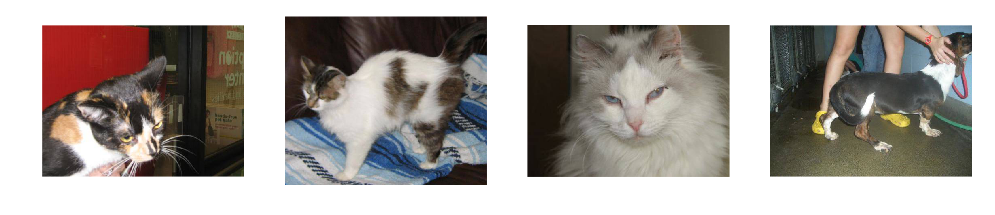

In [16]:
plots_idx(correct_labels[:n_view], val_batches.filenames, valid_path)

In [17]:
probs[1827], our_dog_probs[1827]

(array([  3.2617e-07,   1.0000e+00], dtype=float32), 0.99999964)

### Most certain and most uncertain labels

In [18]:
most_confident_correct_preds = np.argsort(our_dog_probs[correct_labels])
most_confident_dogs = correct_labels[most_confident_correct_preds[-n_view:]]
most_confident_cats = correct_labels[most_confident_correct_preds[:n_view]]

most_confident_incorrect_preds = np.argsort(our_dog_probs[incorrect_labels])
most_confident_incorrect_dogs = incorrect_labels[most_confident_incorrect_preds[-n_view:]]
most_confident_incorrect_cats = incorrect_labels[most_confident_incorrect_preds[:n_view]]
most_confident_incorrect_dogs, our_dog_probs[most_confident_incorrect_dogs], most_confident_incorrect_cats, our_dog_probs[most_confident_incorrect_cats]
val_batches.filenames[41]

'cat/cat.4085.jpg'

attempting to print [1954 1988 1780 1474] in data/redux//valid/
attempting to print [369 424 630 445] in data/redux//valid/
attempting to print [365 816 869  41] in data/redux//valid/
attempting to print [1861 1069 1304 1641] in data/redux//valid/


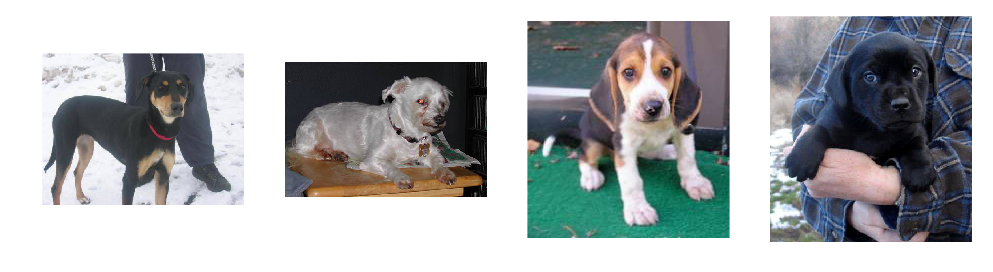

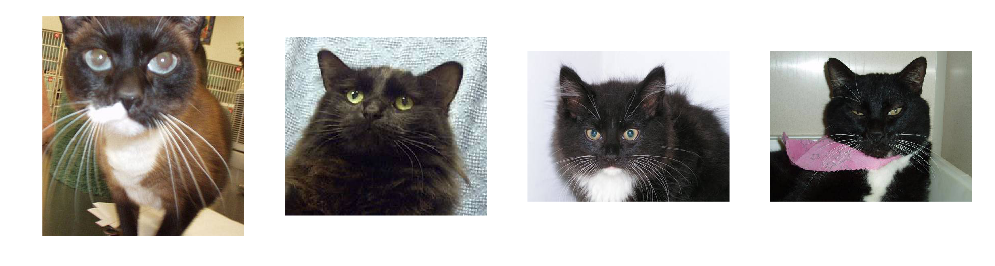

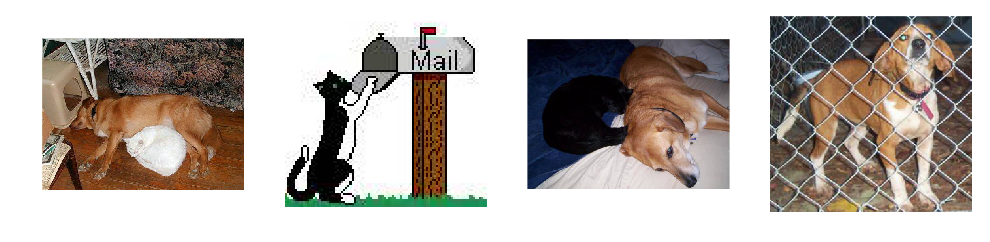

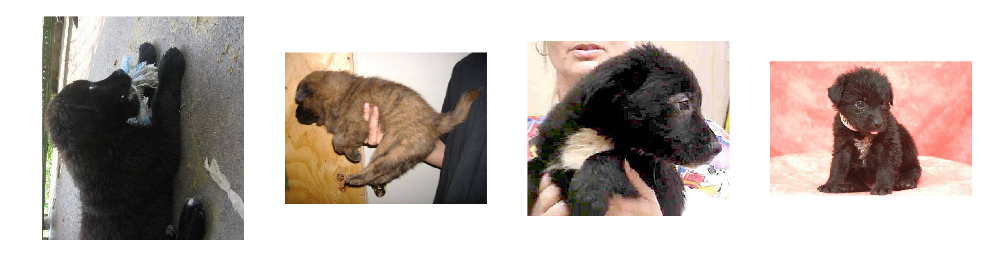

In [20]:
plots_idx(most_confident_dogs, val_batches.filenames, valid_path)
plots_idx(most_confident_cats, val_batches.filenames, valid_path)
plots_idx(most_confident_incorrect_dogs, val_batches.filenames, valid_path)
plots_idx(most_confident_incorrect_cats, val_batches.filenames, valid_path)

In [21]:
### Most uncertain labels

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


attempting to print [715 404 780 125] in data/redux//valid/


'cat/cat.7377.jpg'

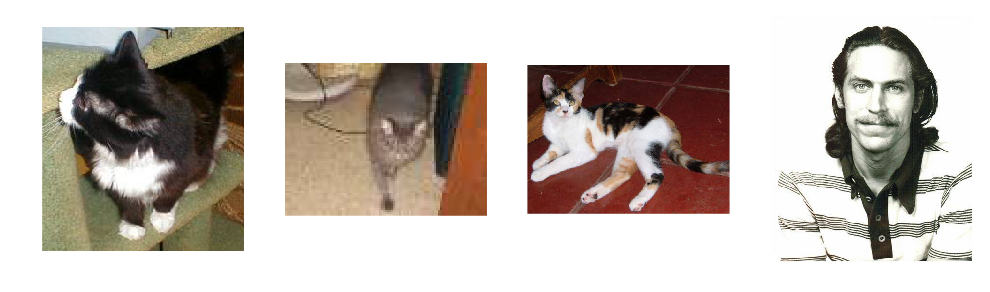

In [22]:
most_uncertain = np.argsort(np.abs(our_dog_probs))[len(our_dog_probs)/2-2:len(our_dog_probs)/2+2]
plots_idx(most_uncertain, val_batches.filenames, valid_path)
val_batches.filenames[125]

### Use the Test set

In [24]:
val_batches, probs = vgg.test(test_path, batch_size = 32)

data/redux/test/
1
128
Found 12500 images belonging to 1 classes.


In [61]:
dog_probs = probs[:,1]

In [62]:
val_batches.filenames[0]

'unknown/9292.jpg'

In [65]:
def getID(fname):
    return (fname.split("/")[1]).split(".")[0]

In [75]:
labeling = [[getID(val_batches.filenames[i]), dog_probs[i]] for i in xrange(len(probs))]

In [85]:
import csv
with open(results_path + "pred_labels.csv", "w") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["id", "label"])
    for label in labeling:
        writer.writerow(label)